# Bài 11: Practice 1

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

# Display more cols
pd.set_option("display.max_columns", 500)

### 1. Load data
- Load file `superstore_sales.xls` vào biến `df`

In [2]:
df = pd.read_excel("data/superstore_sales.xls")

### 2. Inspect data

- Show 3 dòng đầu

In [4]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


- Show 3 dòng cuối

In [6]:
df.tail(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


- Data có bao nhiêu dòng, bao nhiêu cột?

In [7]:
df.shape

(9994, 21)

- In ra list tên các cột

In [9]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

- Kiểu dữ liệu của từng cột

In [10]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### 3. Transform cột


#### 3.1. Đổi tên cột

- Biến tên cột về dạng chữ thường và snake_case

In [31]:
cols = [re.sub("[ -]", "_", x).lower() for x in df.columns]
df.columns = cols

- In ra 1 dòng đầu để kiểm tra

In [33]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


#### 3.2. Đổi về datetime

- Chọn ra cột mà tên có chứa `date` và kiểm tra dtype của chúng

In [38]:
df.filter(regex="date").dtypes

order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

- Nếu chưa ở dạng datetime thì đổi thành datetime. Nếu đã ở dạng datetime thì vẫn cứ đổi lại để practice.

In [37]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

- Kiểm tra kết quả sau khi đổi (run lại câu lệnh trên cùng)

### 4. Trả lời các câu hỏi khác

#### 4.1. Distinct values

- Có bao nhiêu nước và là những nước nào?

In [43]:
df["country"].nunique()

1

In [45]:
df["country"].unique().tolist()

['United States']

- Có bao nhiêu categories và là những categories nào?

In [47]:
df["category"].unique().tolist()

['Furniture', 'Office Supplies', 'Technology']

- Có bao nhiêu subcategories và là những subcategories nào?

In [49]:
df["sub_category"].nunique()

17

- Tương tự có bao nhiêu `city`, `region`, `state`, `ship_mode`, `segment` (gợi ý dùng `for`)

In [51]:
df["city"].nunique()

531

In [55]:
for x in ["city", "region", "state"]:
    print("{}: {}".format(x, df[x].nunique()))
#     print("{}: {}".format(x, df[x].nunique()))

city: 531
region: 4
state: 49


#### 4.2. Làm việc với ngày tháng

- Data chứa các order trong khoảng thời gian nào?

In [60]:
df["order_date"].agg(["min", "max"])

min   2014-01-03
max   2017-12-30
Name: order_date, dtype: datetime64[ns]

- Mỗi năm có bao nhiêu order (sắp xếp theo thứ tự các năm tăng dần)?

- Co cot year
- Group by year
- Count
- Sort theo year

In [66]:
df["order_year"] = df["order_date"].dt.year

In [71]:
df.groupby("order_year").size().sort_index()

order_year
2014    1993
2015    2102
2016    2587
2017    3312
dtype: int64

- Vẽ đồ thị cho thống kê trên

In [72]:
data = df.groupby("order_year").size().sort_index()

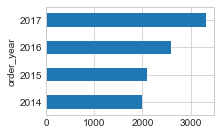

In [79]:
fig, ax = plt.subplots(figsize=(3, 2))
data.plot.barh(ax=ax)
plt.show()

- Mỗi tháng có bao nhiêu order?

In [82]:
df["order_month"] = df["order_date"].dt.month

In [93]:
data = df.groupby(["order_year", "order_month"]).size()\
    .sort_index().reset_index()\
    .rename(columns={0: "n_orders"})

data.head(5)

,order_year,order_month,n_orders
0,2014,1,79
1,2014,2,46
2,2014,3,157
3,2014,4,135
4,2014,5,122


In [97]:
df["order_ym"] = df["order_date"].astype(str).str[:7]

In [103]:
data = df.groupby("order_ym").size()\
    .sort_index()

data.head(5)

order_ym
2014-01     79
2014-02     46
2014-03    157
2014-04    135
2014-05    122
dtype: int64

In [105]:
data.shape

(48,)

- Vẽ plot cho data trên (bar, line)

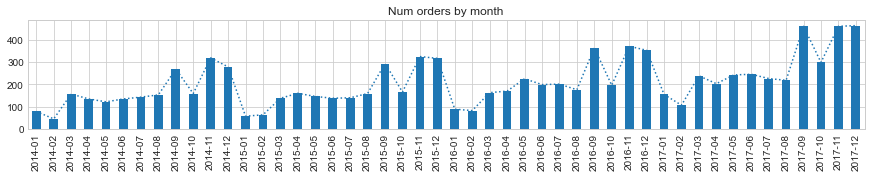

In [124]:
# Intro
fig, ax = plt.subplots(figsize=(15, 2))

# Plot data
data.plot.line(linestyle="dotted", ax=ax)
data.plot.bar(ax=ax)

# Decorate
ax.set_title("Num orders by month")
ax.set_xlabel(None)

# Conclusion
plt.show()

- Vẽ barplot như trên nhưng alternate màu của 2 năm liên tiếp

In [149]:
df["order_year_odd"] = df["order_year"].apply(lambda x: int(x) % 2)

0       0
1       0
2       0
3       1
4       1
       ..
9989    0
9990    1
9991    1
9992    1
9993    1
Name: order_year, Length: 9994, dtype: int64

In [139]:
data = df.groupby(["order_ym", "order_year_odd"]).size()\
    .sort_index().reset_index()\
    .rename(columns={0: "n_orders"})

data.head(5)

,order_ym,order_year_odd,n_orders
0,2014-01,0,79
1,2014-02,0,46
2,2014-03,0,157
3,2014-04,0,135
4,2014-05,0,122


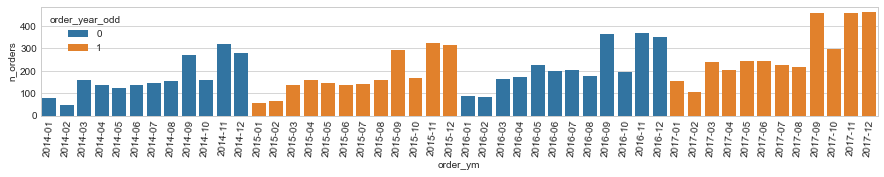

In [147]:
# Intro
fig, ax = plt.subplots(figsize=(15, 2))

# Plot data
sns.barplot(
    x="order_ym",
    y="n_orders",
    hue="order_year_odd",
    dodge=False,
    data=data,
    ax=ax
)

# Decoration
xticks = data["order_ym"].tolist()
ax.set_xticklabels(xticks, rotation=85)

# Conclusion
plt.show()

- Như yêu cầu trên nhưng vẽ line plot (gợi ý, dùng `sns.pointplot`)

### 4.3. Doanh thu

- Lấy ra các đơn hàng của năm 2017

- Có bao nhiêu đơn hàng?

- Số đơn hàng mỗi tháng?

- Lấy ra top 10 sản phẩm có doanh số cao nhất 2017

- Lấy ra top 10 như trên nhưng tô màu theo category

- Lọc ra top 5 sub-categories có Sales nhiều nhất trong năm 2017

- Vẽ barplot cho sales của 5 sub-categories theo từng năm từ năm 2014-2017

- Vẽ boxplot của doanh số daily từng category theo các năm

- Vẽ KDE của doanh số daily từng category theo các năm

- Vẽ daily sales against daily quantity

- Vẽ daily sales against daily quantity (từ category ra riêng từng subplots)

- Lọc ra các đơn hàng bị chuyển chậm hơn 3 ngày

- Có bao nhiêu đơn như vậy

- Đơn hàng trễ nhất là bao lâu?

- Vẽ boxplot thời gian chờ cho từng `region`

- Vẽ boxplot thời gian chờ cho từng `ship_mode`

- Điều chỉnh lại subplots trên sao cho box xếp theo thứ tự `Same day`, `First Class`, `Second Class`, `Standard Class`